In [128]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_validate


In [129]:
# Preparing data to use for liner regression 

file_startups, file_salary = r"data\startups.csv", r"data\salary.csv"
df_startups, df_salary = pd.read_csv(file_startups), pd.read_csv(file_salary)

df_startups = pd.get_dummies(df_startups, columns = ['State'], dtype=int) 
X_startups = np.array(df_startups[["R&D Spend", "Administration", "Marketing Spend", "State_California", "State_Florida", "State_New York"]])
Y_startups = np.array(df_startups[["Profit"]])

X_salary = np.array(df_salary[["YearsExperience"]])
Y_salary = np.array(df_salary[["Salary"]])


In [175]:
# Implementing simple regression model for startups.csv and salary.csv

X_startups_train, X_startups_test, Y_startups_train, Y_startups_test = train_test_split(X_startups, Y_startups, test_size=0.2, random_state=5)
X_salary_train, X_salary_test, Y_salary_train, Y_salary_test = train_test_split(X_salary, Y_salary, test_size=0.2, random_state=5)

reg_startups = linear_model.LinearRegression()
reg_salary = linear_model.LinearRegression()

reg_startups.fit(X_startups_train, Y_startups_train)
print(f"Score of startups linear regression: \t{reg_startups.score(X_startups_test, Y_startups_test)}")

reg_salary.fit(X_salary_train, Y_salary_train)
print(f"Score of salary linear regression: \t{reg_salary.score(X_salary_test, Y_salary_test)}")


Score of startups linear regression: 	0.9669763022156828
Score of salary linear regression: 	0.9439628569611375


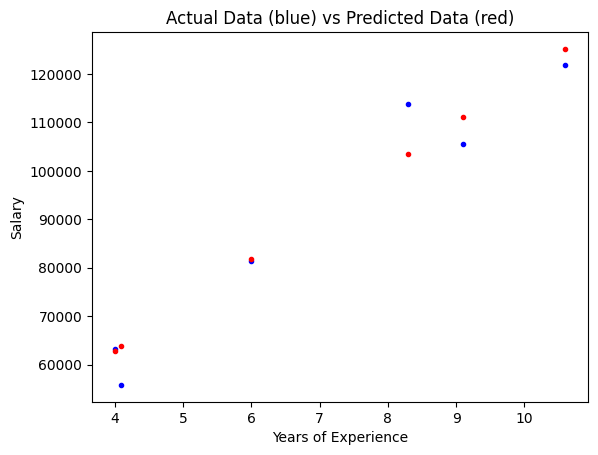

In [176]:
# Plotting X_test vs Y_test and Y_predict for visualization

Y_salary_predict = reg_salary.predict(X_salary_test)
plt.scatter(X_salary_test, Y_salary_test, color='blue', marker='.')
plt.scatter(X_salary_test, Y_salary_predict, color='red', marker='.')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Actual Data (blue) vs Predicted Data (red)")
plt.show()

In [179]:
# Calculating RSS and R2 score

rss, tss, mean_Y_salary_test = 0, 0, np.mean(Y_salary_test)

for i in range(len(Y_salary_test)):
    rss += (int(Y_salary_predict[i]) - int(Y_salary_test[i]))**2
    tss += (int(Y_salary_test[i]) - mean_Y_salary_test)**2

print(f"R2 Score: \t{1-(rss/tss)}")

R2 Score: 	0.9439612009039768


C:\Users\adity\AppData\Local\Temp\ipykernel_34296\3764693477.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rss += (int(Y_salary_predict[i]) - int(Y_salary_test[i]))**2
C:\Users\adity\AppData\Local\Temp\ipykernel_34296\3764693477.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  tss += (int(Y_salary_test[i]) - mean_Y_salary_test)**2
